X sütunlarının türleri:
Gerceklesendogalgaz    float64
Gerceklesenbarajli     float64
Gerceklesenlinyit      float64
Gerceklesenruzgar      float64
Gerceklesengunes       float64
Dolar                  float64
Euro                   float64
Talepislemhacmi        float64
Arzislemhacmi          float64
Gerceklesentoplam      float64
dtype: object
X_train boyutu: (32636, 10)
X_test boyutu: (8160, 10)

Özellik Önemleri:
               Feature  Importance
6                 Euro    0.730546
2    Gerceklesenlinyit    0.080269
9    Gerceklesentoplam    0.051224
5                Dolar    0.038638
7      Talepislemhacmi    0.032911
1   Gerceklesenbarajli    0.022552
8        Arzislemhacmi    0.016462
3    Gerceklesenruzgar    0.011526
4     Gerceklesengunes    0.008200
0  Gerceklesendogalgaz    0.007674


C:\Users\PC\AppData\Local\Temp\ipykernel_16852\4032142478.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


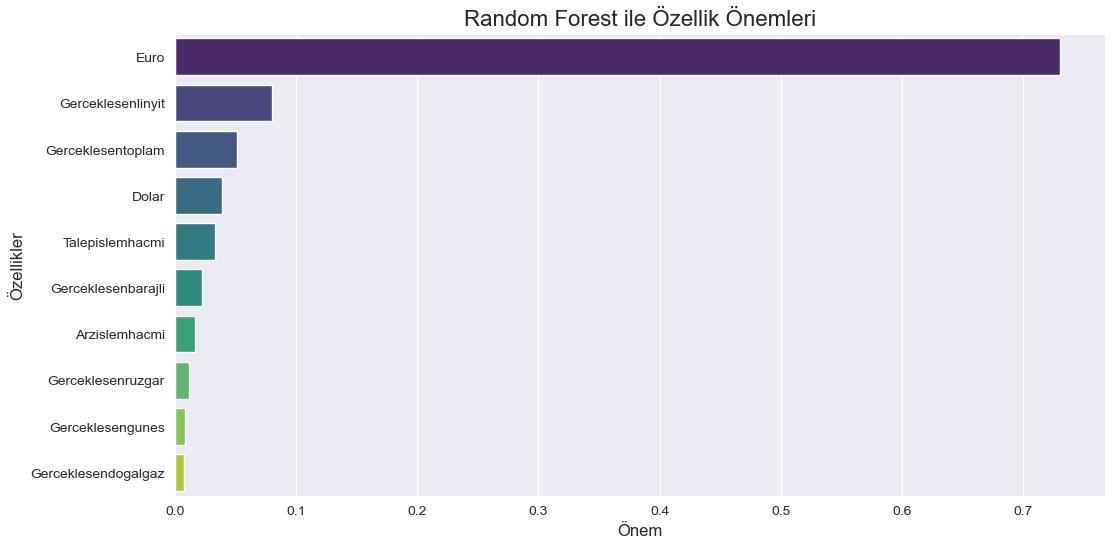

Model başarıyla eğitildi ve görselleştirme tamamlandı!


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolunu güncelleyin
file_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\cleaned_smfdb_fixed.csv"

# Veri setini yükleme
columns = [
    "Tarih", "Blokeslesmemiktari", "Saatlikeslesmemiktari", "Minalisfiyati",
    "Maxalisfiyati", "Minsatisfiyati", "Maxsatisfiyati", "Mineslesmefiyati",
    "Maxeslesmefiyati", "Talepislemhacmi", "Arzislemhacmi", "Gerceklesendogalgaz",
    "Gerceklesenbarajli", "Gerceklesenlinyit", "Gerceklesenruzgar", "Gerceklesengunes",
    "Gerceklesenfueloil", "Gerceklesenjeotermal", "Gerceklesenasfaltitkomur",
    "Gerceklesentaskomur", "Gerceklesenbiyokutle", "Gerceklesennafta",
    "Gerceklesenlng", "Gerceklesenuluslararasi", "Gerceklesentoplam", "Smf",
    "Ptf", "Ptfdolar", "Ptfeuro", "Dolar", "Euro", "Smfdolar", "Smfeuro"
]

data = pd.read_csv(file_path, names=columns, skiprows=1)

# SMF hedefi ve özellik sütunları
target = "Smf"
features = [
    "Gerceklesendogalgaz", "Gerceklesenbarajli", "Gerceklesenlinyit",
    "Gerceklesenruzgar", "Gerceklesengunes", "Dolar", "Euro",
    "Talepislemhacmi", "Arzislemhacmi", "Gerceklesentoplam"
]

X = data[features]
y = data[target]

# Sonsuz değerleri temizleme
X = X.replace([float('inf'), -float('inf')], None)  # Sonsuz değerleri NaN olarak işaretle
X = X.fillna(0)  # NaN olanları sıfırla doldur

# Özelliklerin türlerini kontrol et
print("X sütunlarının türleri:")
print(X.dtypes)

# Eğitim ve test veri kümelerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test boyutlarını kontrol edin
print("X_train boyutu:", X_train.shape)
print("X_test boyutu:", X_test.shape)

# Standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest modeli oluştur ve eğit
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Özellik önemlerini hesapla
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Özellik önemlerini yazdır
print("\nÖzellik Önemleri:")
print(importance_df)

# Özellik önemlerini görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Random Forest ile Özellik Önemleri", fontsize=16)
plt.xlabel("Önem", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.show()

print("Model başarıyla eğitildi ve görselleştirme tamamlandı!")


In [19]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Basit bir veri seti oluştur
X = np.random.rand(100, 5)  # 100 örnek, 5 özellik
y = np.random.rand(100)     # 100 hedef

# Random Forest modeli eğit
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

print("Model başarıyla eğitildi!")

print("X_train sütun türleri:")
print(X_train.dtypes)

print("\ny_train türü:")
print(type(y_train))
print(y_train.head())

print("\nX_train içindeki eksik değerler:")
print(X_train.isnull().sum())

print("\nX_train içindeki sonsuz değerler:")
print((X_train == float('inf')).sum())
print((X_train == -float('inf')).sum())

print("\ny_train içindeki eksik değerler:")
print(y_train.isnull().sum())

print("\ny_train içindeki sonsuz değerler:")
print((y_train == float('inf')).sum())
print((y_train == -float('inf')).sum())

print("\nX_train boyutu:", X_train.shape)
print("y_train boyutu:", y_train.shape)


Model başarıyla eğitildi!
X_train sütun türleri:
Gerceklesendogalgaz    float64
Gerceklesenbarajli     float64
Gerceklesenlinyit      float64
Gerceklesenruzgar      float64
Gerceklesengunes       float64
Dolar                  float64
Euro                   float64
Talepislemhacmi        float64
Arzislemhacmi          float64
Gerceklesentoplam      float64
dtype: object

y_train türü:
<class 'pandas.core.series.Series'>
09/07/2019 07:00  195.1     340.0
25/11/2020 00:00  204.9     203.5
22/05/2019 02:00  346.1     309.9
09/02/2023 02:00  665.4    3000.0
27/10/2022 19:00  886.4    4800.0
Name: Smf, dtype: float64

X_train içindeki eksik değerler:
Gerceklesendogalgaz    0
Gerceklesenbarajli     0
Gerceklesenlinyit      0
Gerceklesenruzgar      0
Gerceklesengunes       0
Dolar                  0
Euro                   0
Talepislemhacmi        0
Arzislemhacmi          0
Gerceklesentoplam      0
dtype: int64

X_train içindeki sonsuz değerler:
Gerceklesendogalgaz    0
Gerceklesenbarajli     

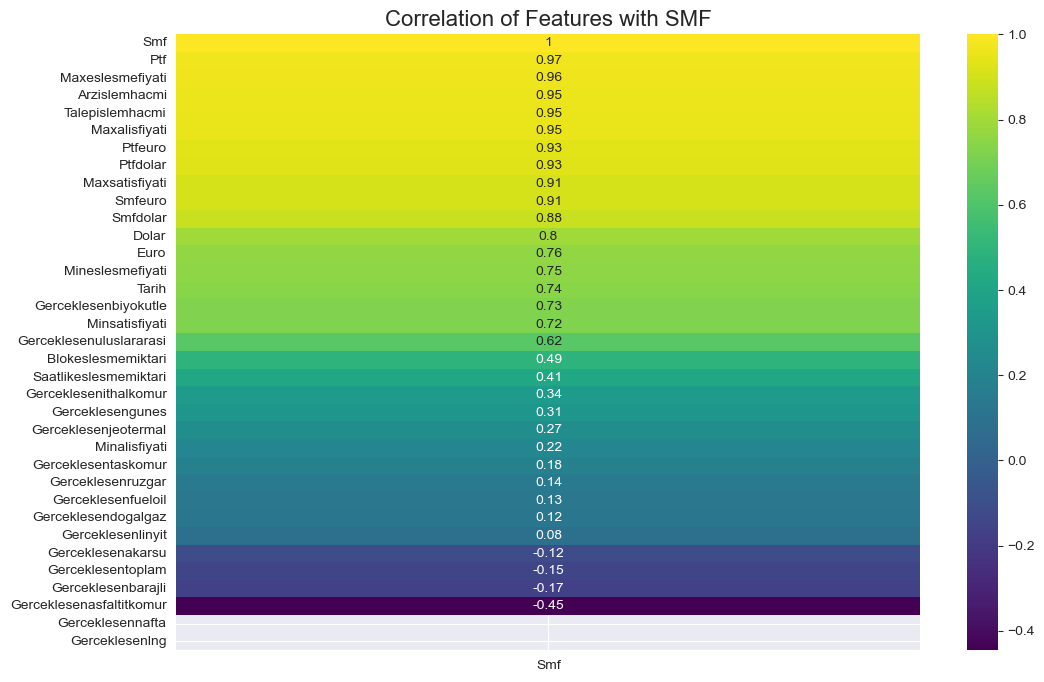

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Veri yükleme
file_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\cleaned_smfdb_fixed.csv"
# Dosya yolunu güncelle
columns = [
    "Tarih", "Blokeslesmemiktari", "Saatlikeslesmemiktari", "Minalisfiyati",
    "Maxalisfiyati", "Minsatisfiyati", "Maxsatisfiyati", "Mineslesmefiyati",
    "Maxeslesmefiyati", "Talepislemhacmi", "Arzislemhacmi", "Gerceklesendogalgaz",
    "Gerceklesenbarajli", "Gerceklesenlinyit", "Gerceklesenakarsu", "Gerceklesenithalkomur",
    "Gerceklesenruzgar", "Gerceklesengunes", "Gerceklesenfueloil", "Gerceklesenjeotermal",
    "Gerceklesenasfaltitkomur", "Gerceklesentaskomur", "Gerceklesenbiyokutle",
    "Gerceklesennafta", "Gerceklesenlng", "Gerceklesenuluslararasi", "Gerceklesentoplam",
    "Smf", "Ptf", "Ptfdolar", "Ptfeuro", "Dolar", "Euro", "Smfdolar", "Smfeuro"
]

data = pd.read_csv(file_path, names=columns, skiprows=1, parse_dates=["Tarih"], dayfirst=True)

# Korelasyon matrisi
correlation_matrix = data.corr()

# SMF ile ilişkili sütunları görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[["Smf"]].sort_values(by="Smf", ascending=False),
    annot=True, cmap="viridis"
)
plt.title("Correlation of Features with SMF", fontsize=16)
plt.show()


Sorunlu sütunları tespit ediliyor...

Univariate analiz başlıyor...


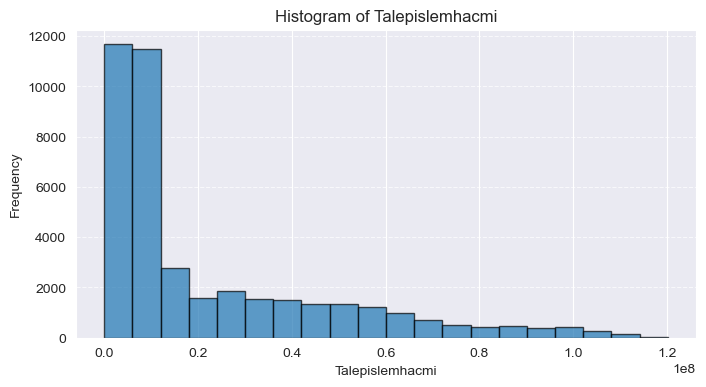

Summary Statistics for Talepislemhacmi:
count    4.079600e+04
mean     2.270784e+07
std      2.551218e+07
min      0.000000e+00
25%      5.656933e+06
50%      8.299676e+06
75%      3.470637e+07
max      1.201589e+08
Name: Talepislemhacmi, dtype: float64
Skewness: 1.521992304910554, Kurtosis: 1.503776336315911
--------------------------------------------------


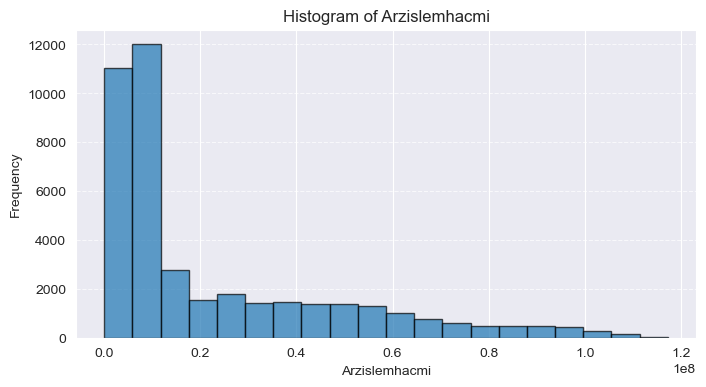

Summary Statistics for Arzislemhacmi:
count    4.079600e+04
mean     2.272147e+07
std      2.527866e+07
min      0.000000e+00
25%      5.665623e+06
50%      8.324121e+06
75%      3.527225e+07
max      1.172921e+08
Name: Arzislemhacmi, dtype: float64
Skewness: 1.4653857817794176, Kurtosis: 1.2514548649234372
--------------------------------------------------


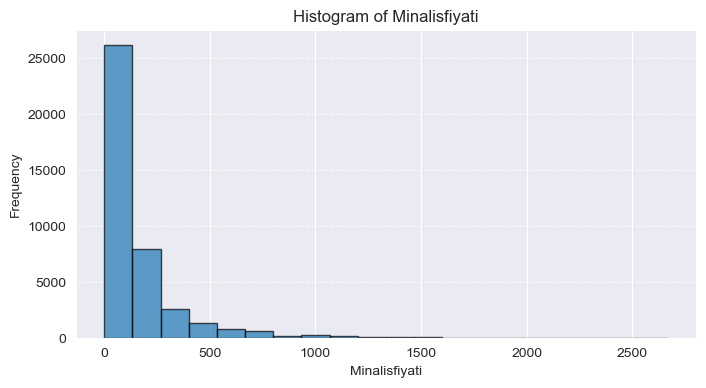

Summary Statistics for Minalisfiyati:
count    40796.000000
mean       151.478629
std        253.972782
min          0.000000
25%          1.000000
50%         50.000000
75%        207.000000
max       2668.490000
Name: Minalisfiyati, dtype: float64
Skewness: 3.237772621012891, Kurtosis: 14.017932450722755
--------------------------------------------------


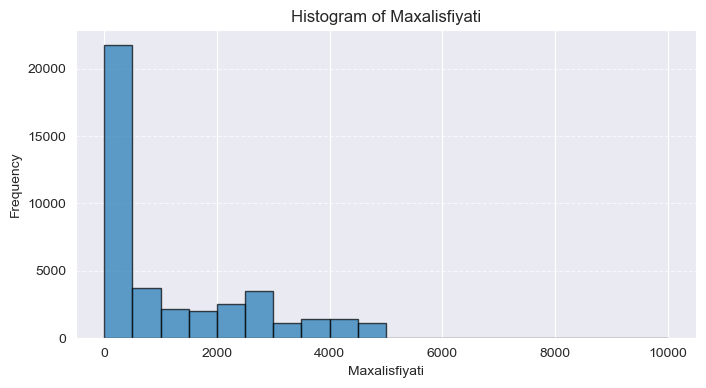

Summary Statistics for Maxalisfiyati:
count    40796.000000
mean      1267.449779
std       1338.257434
min          2.790000
25%        325.610000
50%        419.765000
75%       2240.200000
max       9999.990000
Name: Maxalisfiyati, dtype: float64
Skewness: 1.2609221580180578, Kurtosis: 0.6705941348138142
--------------------------------------------------


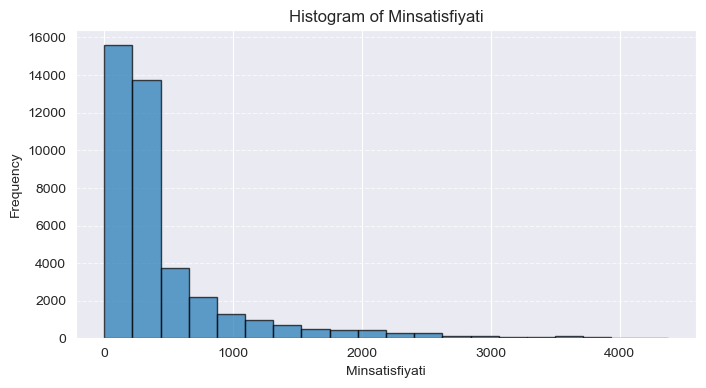

Summary Statistics for Minsatisfiyati:
count    40796.000000
mean       446.547719
std        576.035416
min          0.000000
25%        111.000000
50%        270.000000
75%        500.000000
max       4372.120000
Name: Minsatisfiyati, dtype: float64
Skewness: 2.7067498158534344, Kurtosis: 8.533047809667329
--------------------------------------------------


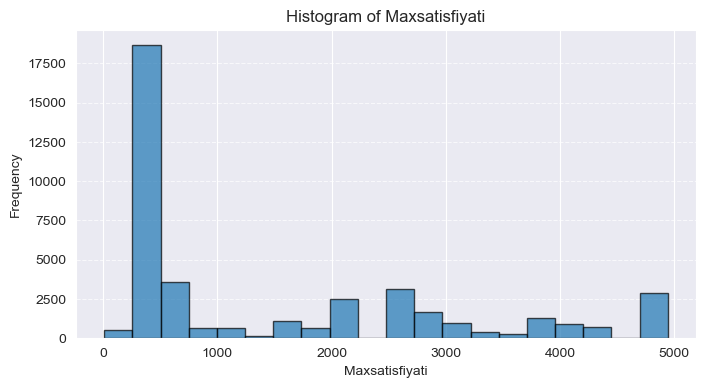

Summary Statistics for Maxsatisfiyati:
count    40796.000000
mean      1563.860569
std       1512.503871
min          9.300000
25%        390.000000
50%        600.000000
75%       2678.000000
max       4944.000000
Name: Maxsatisfiyati, dtype: float64
Skewness: 0.9794458097703836, Kurtosis: -0.39062627167219466
--------------------------------------------------


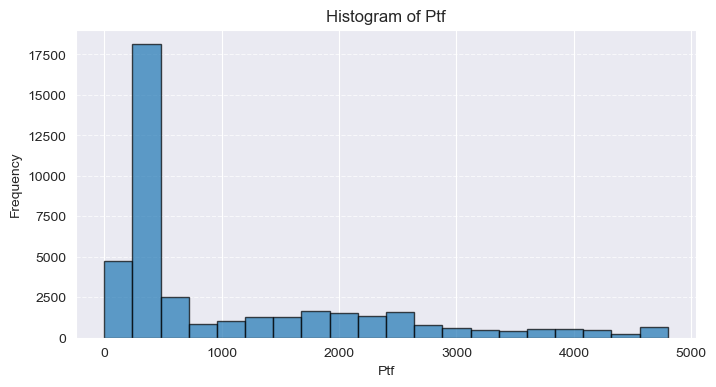

Summary Statistics for Ptf:
count    40796.000000
mean      1077.757544
std       1179.511302
min          0.000000
25%        302.907500
50%        339.435000
75%       1745.000000
max       4800.000000
Name: Ptf, dtype: float64
Skewness: 1.4230544055567318, Kurtosis: 1.0853599250815615
--------------------------------------------------


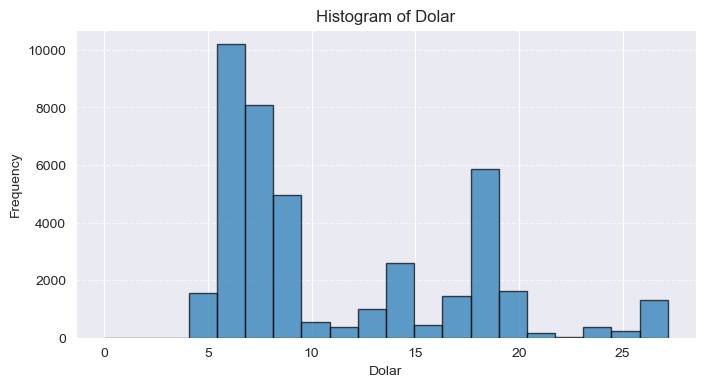

Summary Statistics for Dolar:
count    40796.000000
mean        11.185938
std          5.963766
min          0.000000
25%          6.130000
50%          8.290000
75%         17.260000
max         27.180000
Name: Dolar, dtype: float64
Skewness: 0.8962901577129008, Kurtosis: -0.36605513892985764
--------------------------------------------------


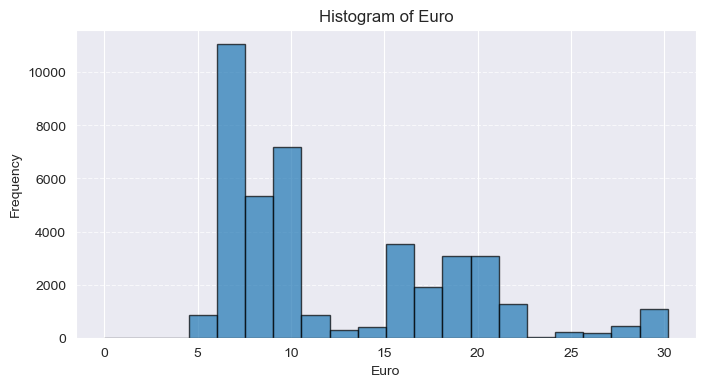

Summary Statistics for Euro:
count    40796.000000
mean        12.324336
std          6.181590
min          0.000000
25%          6.860000
50%          9.850000
75%         17.780000
max         30.190000
Name: Euro, dtype: float64
Skewness: 0.9442956180643678, Kurtosis: 0.026176453022643376
--------------------------------------------------


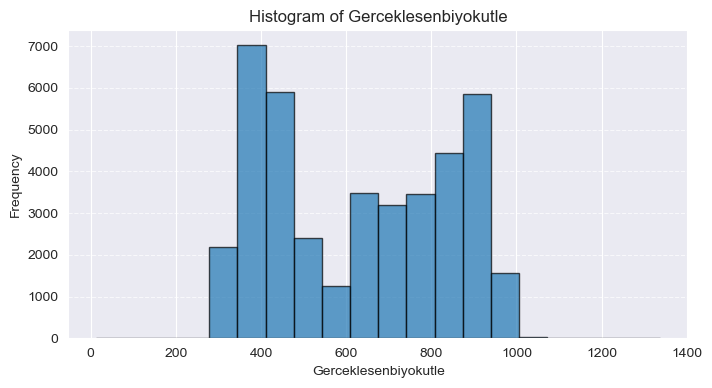

Summary Statistics for Gerceklesenbiyokutle:
count    40796.000000
mean       629.480847
std        212.034158
min         13.500000
25%        428.797500
50%        644.650000
75%        841.152500
max       1337.430000
Name: Gerceklesenbiyokutle, dtype: float64
Skewness: 0.03556939465584431, Kurtosis: -1.4707480627248561
--------------------------------------------------


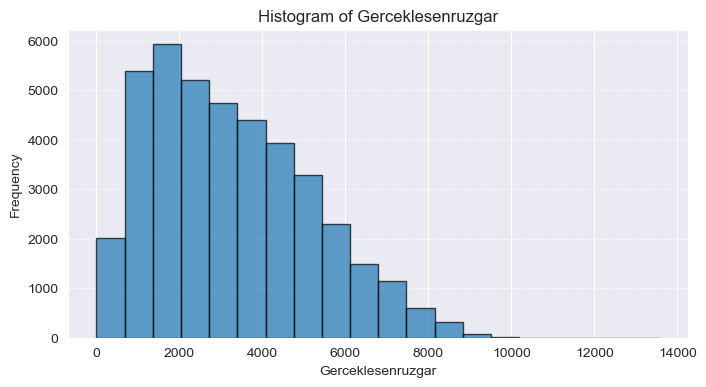

Summary Statistics for Gerceklesenruzgar:
count    40796.000000
mean      3255.813196
std       1912.435898
min          1.140000
25%       1671.160000
50%       2988.060000
75%       4567.445000
max      13581.390000
Name: Gerceklesenruzgar, dtype: float64
Skewness: 0.5810040383590959, Kurtosis: -0.3311386705126025
--------------------------------------------------


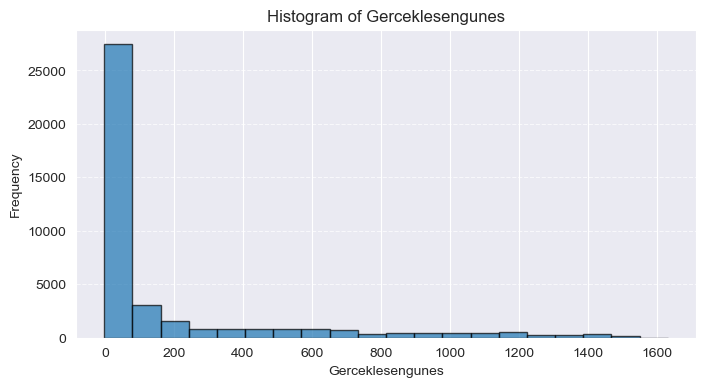

Summary Statistics for Gerceklesengunes:
count    40796.000000
mean       183.930881
std        341.334874
min         -1.700000
25%          0.000000
50%          6.830000
75%        163.982500
max       1631.620000
Name: Gerceklesengunes, dtype: float64
Skewness: 2.147565893637302, Kurtosis: 3.755488011484793
--------------------------------------------------


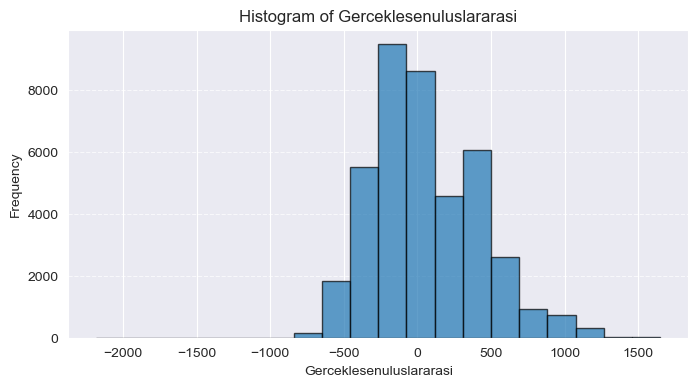

Summary Statistics for Gerceklesenuluslararasi:
count    40796.000000
mean        55.143614
std        360.268577
min      -2180.660000
25%       -209.992500
50%          0.000000
75%        325.202500
max       1648.540000
Name: Gerceklesenuluslararasi, dtype: float64
Skewness: 0.6071391574263424, Kurtosis: 0.19004262918404224
--------------------------------------------------

Multivariate analiz başlıyor...


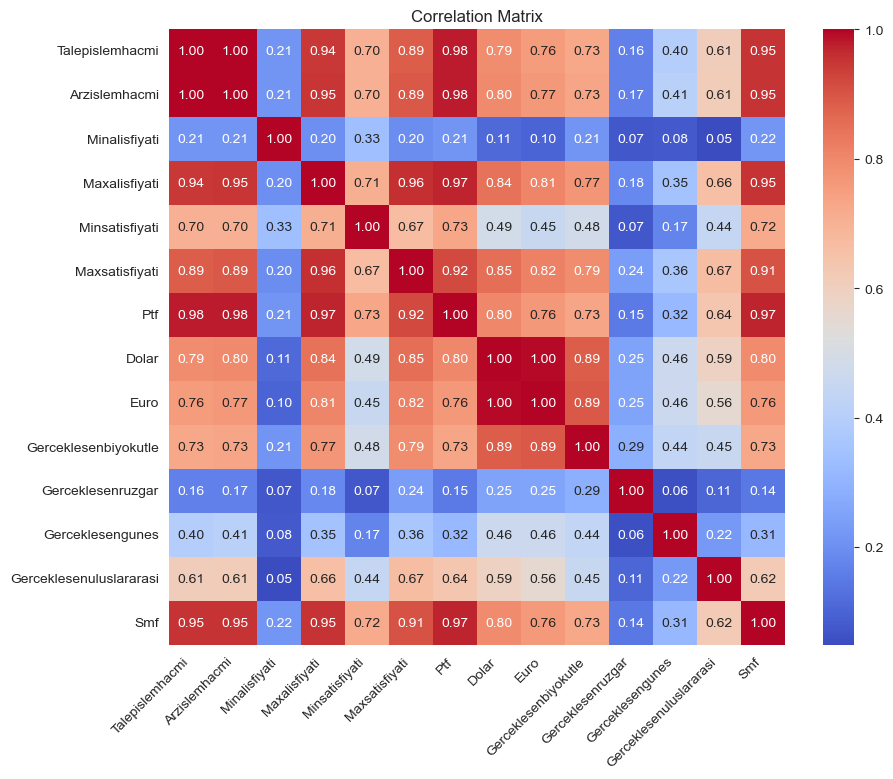

In [14]:
from src.utils.visualization import univariate_analysis, multivariate_analysis
import pandas as pd
import matplotlib.pyplot as plt

# Veri yükleme
file_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\smfdb_weather_dataa.csv"
data = pd.read_csv(file_path)

# Sayısal sütunlar ve hedef değişken
columns = [
    'Talepislemhacmi', 'Arzislemhacmi',
    'Minalisfiyati', 'Maxalisfiyati', 'Minsatisfiyati', 'Maxsatisfiyati',
    'Ptf', 'Dolar', 'Euro', 'Gerceklesenbiyokutle',
    'Gerceklesenruzgar', 'Gerceklesengunes', 'Gerceklesenuluslararasi'
]

target_column = 'Smf'

# 1. Sorunlu sütunları tespit etme
print("Sorunlu sütunları tespit ediliyor...")
problematic_columns = []
for col in columns:
    try:
        # Histogram test eder
        data[col].hist(bins=20)
        plt.close()  # Eğer sorun yoksa figürü kapatır
    except Exception as e:
        problematic_columns.append(col)
        print(f"Hata veren sütun: {col}")
        print(f"Hata detayı: {e}")

if problematic_columns:
    print("\nAnalizden çıkarılacak sütunlar:", problematic_columns)
    columns = [col for col in columns if col not in problematic_columns]

# 2. Univariate Analiz
print("\nUnivariate analiz başlıyor...")
univariate_analysis(data, columns)

# 3. Multivariate Analiz
print("\nMultivariate analiz başlıyor...")
multivariate_analysis(data, columns, target_column)


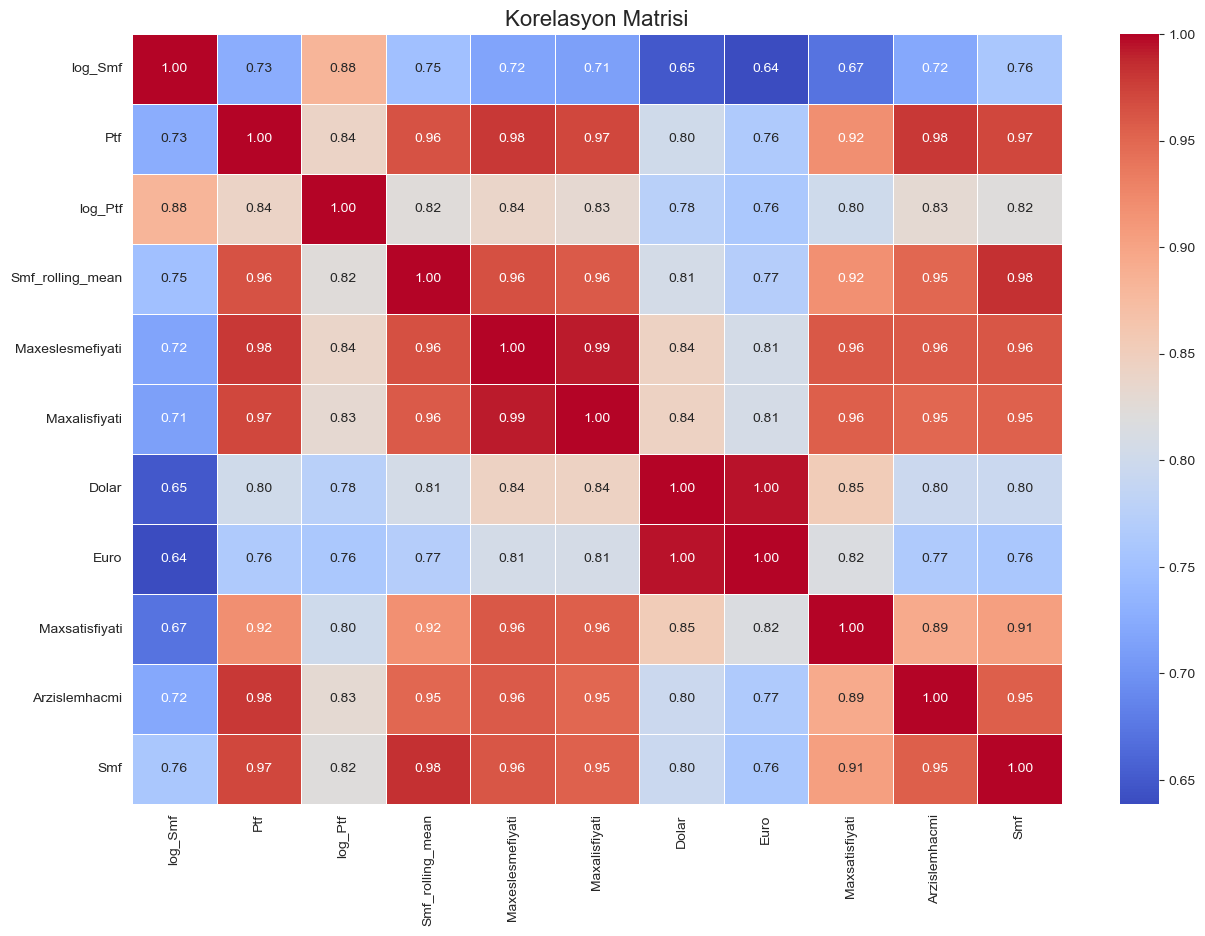

Yüksek Korelasyonlu Özellik Çiftleri:
('Smf_rolling_mean', 'Ptf')
('Maxeslesmefiyati', 'Ptf')
('Maxeslesmefiyati', 'Smf_rolling_mean')
('Maxalisfiyati', 'Ptf')
('Maxalisfiyati', 'Smf_rolling_mean')
('Maxalisfiyati', 'Maxeslesmefiyati')
('Euro', 'Dolar')
('Maxsatisfiyati', 'Ptf')
('Maxsatisfiyati', 'Smf_rolling_mean')
('Maxsatisfiyati', 'Maxeslesmefiyati')
('Maxsatisfiyati', 'Maxalisfiyati')
('Arzislemhacmi', 'Ptf')
('Arzislemhacmi', 'Smf_rolling_mean')
('Arzislemhacmi', 'Maxeslesmefiyati')
('Arzislemhacmi', 'Maxalisfiyati')
('Smf', 'Ptf')
('Smf', 'Smf_rolling_mean')
('Smf', 'Maxeslesmefiyati')
('Smf', 'Maxalisfiyati')
('Smf', 'Maxsatisfiyati')
('Smf', 'Arzislemhacmi')


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
data_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\feature_selection.csv"
data = pd.read_csv(data_path)

# Korelasyon matrisi hesaplama
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Korelasyon Matrisi", fontsize=16)
plt.show()

# Yüksek korelasyon eşik değerine göre filtreleme
threshold = 0.9
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Yüksek Korelasyonlu Özellik Çiftleri:")
for pair in high_corr_pairs:
    print(pair)


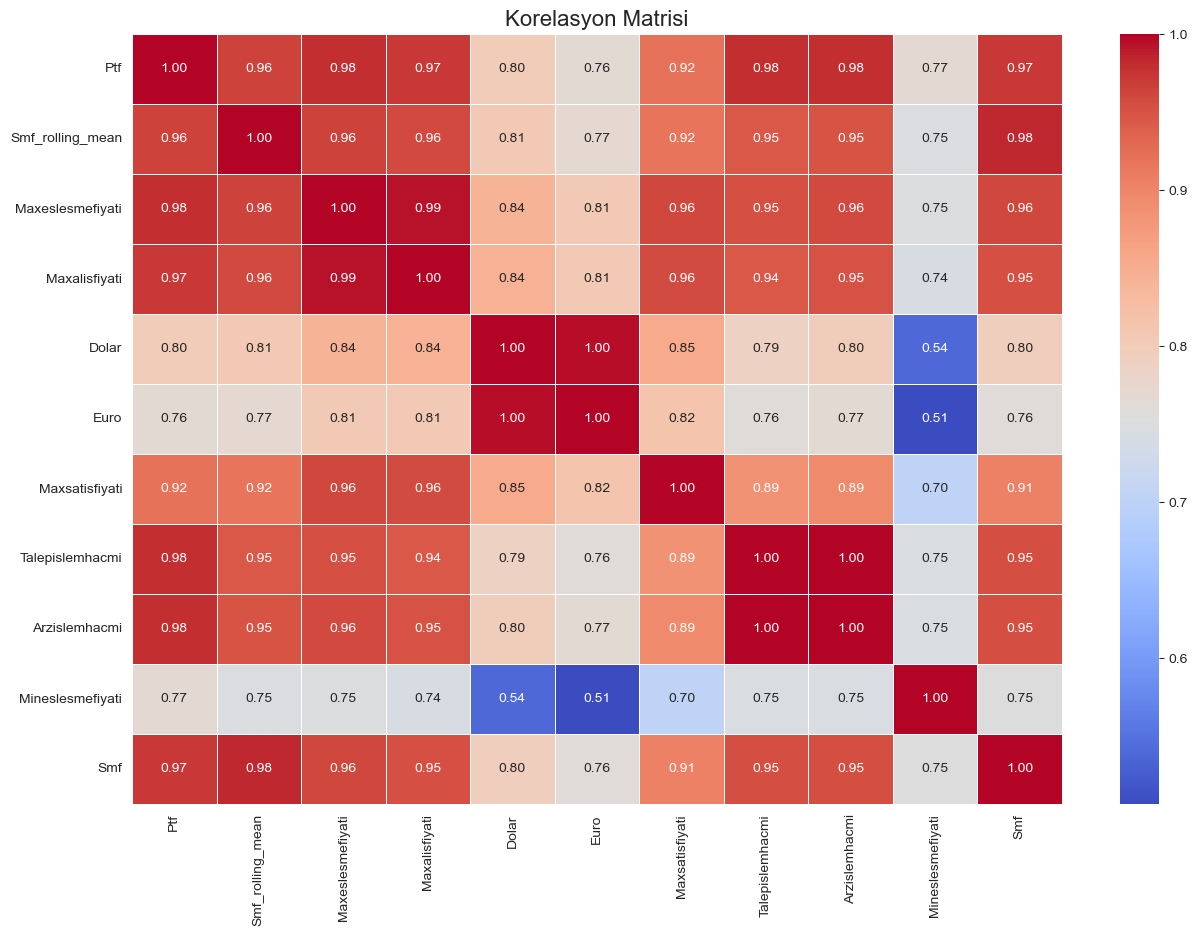

Yüksek Korelasyonlu Özellik Çiftleri:
('Smf_rolling_mean', 'Ptf')
('Maxeslesmefiyati', 'Ptf')
('Maxeslesmefiyati', 'Smf_rolling_mean')
('Maxalisfiyati', 'Ptf')
('Maxalisfiyati', 'Smf_rolling_mean')
('Maxalisfiyati', 'Maxeslesmefiyati')
('Euro', 'Dolar')
('Maxsatisfiyati', 'Ptf')
('Maxsatisfiyati', 'Smf_rolling_mean')
('Maxsatisfiyati', 'Maxeslesmefiyati')
('Maxsatisfiyati', 'Maxalisfiyati')
('Talepislemhacmi', 'Ptf')
('Talepislemhacmi', 'Smf_rolling_mean')
('Talepislemhacmi', 'Maxeslesmefiyati')
('Talepislemhacmi', 'Maxalisfiyati')
('Arzislemhacmi', 'Ptf')
('Arzislemhacmi', 'Smf_rolling_mean')
('Arzislemhacmi', 'Maxeslesmefiyati')
('Arzislemhacmi', 'Maxalisfiyati')
('Arzislemhacmi', 'Talepislemhacmi')
('Smf', 'Ptf')
('Smf', 'Smf_rolling_mean')
('Smf', 'Maxeslesmefiyati')
('Smf', 'Maxalisfiyati')
('Smf', 'Maxsatisfiyati')
('Smf', 'Talepislemhacmi')
('Smf', 'Arzislemhacmi')


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
data_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\final_feature_selection.csv"
data = pd.read_csv(data_path)

# Korelasyon matrisi hesaplama
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Korelasyon Matrisi", fontsize=16)
plt.show()

# Yüksek korelasyon eşik değerine göre filtreleme
threshold = 0.9
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Yüksek Korelasyonlu Özellik Çiftleri:")
for pair in high_corr_pairs:
    print(pair)


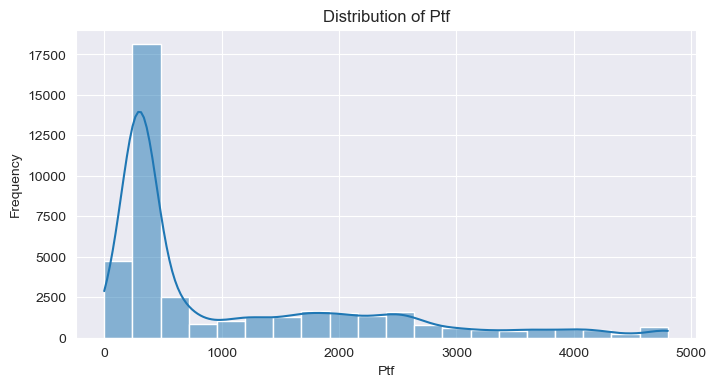

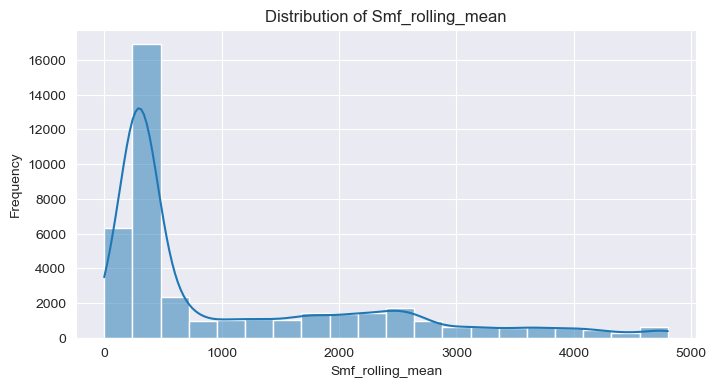

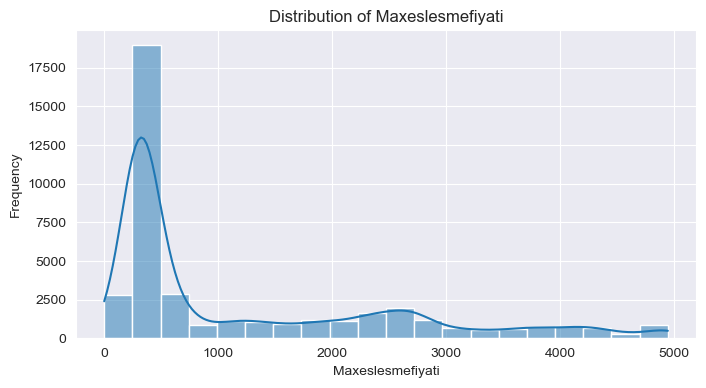

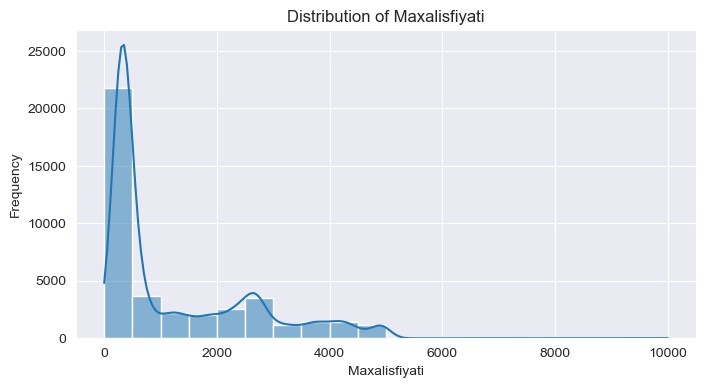

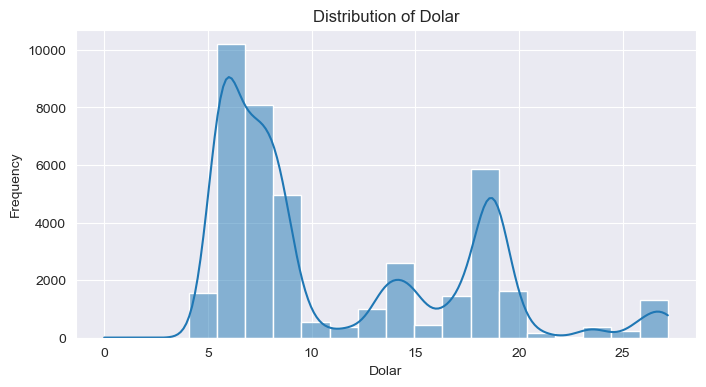

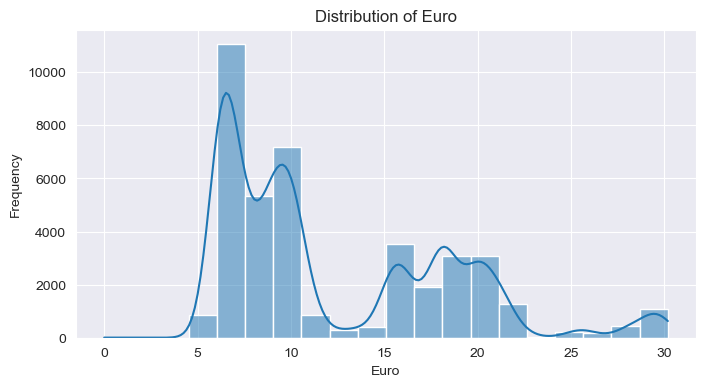

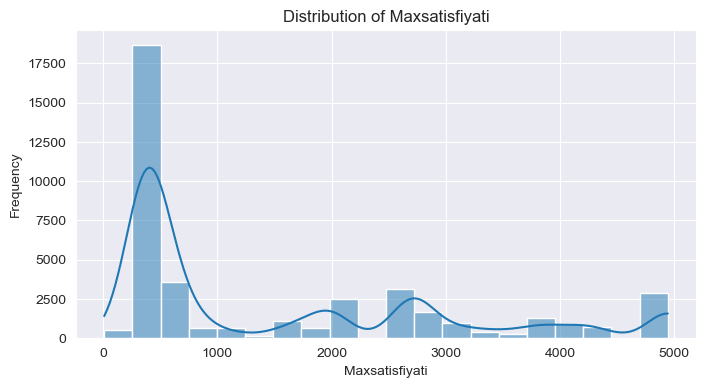

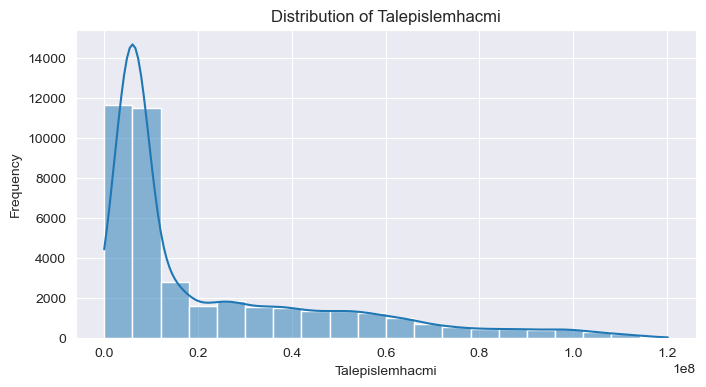

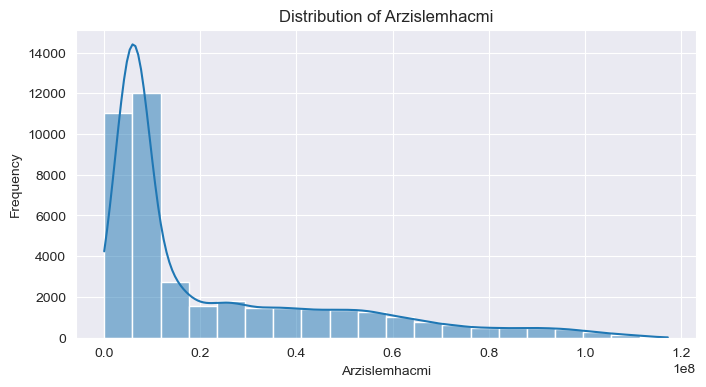

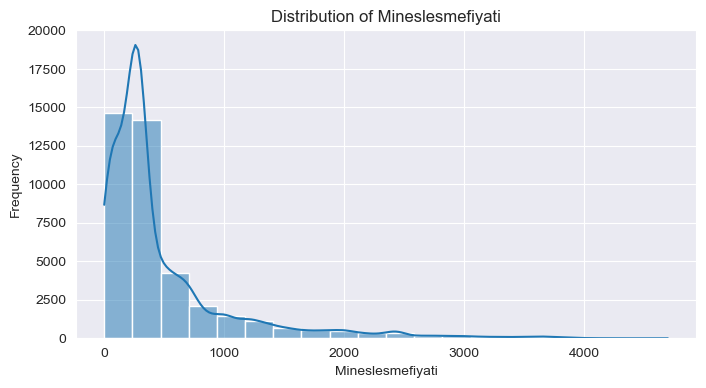

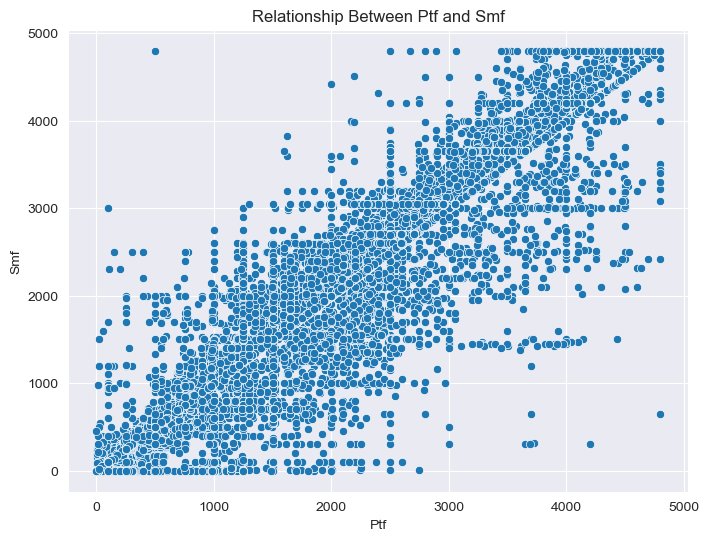

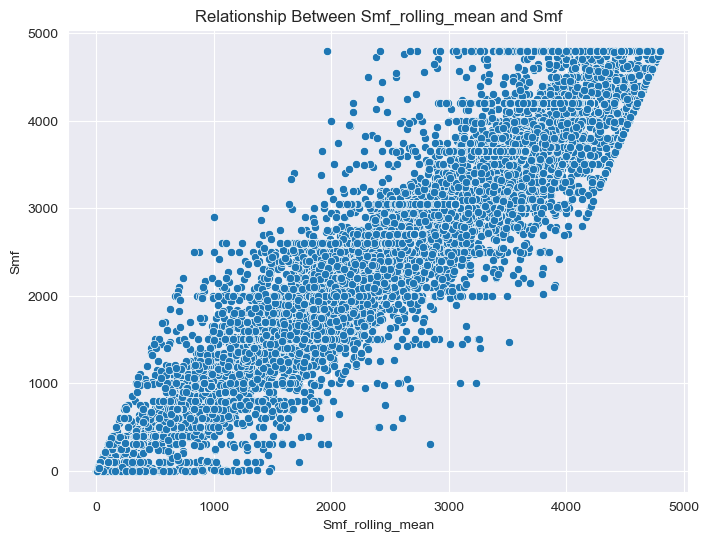

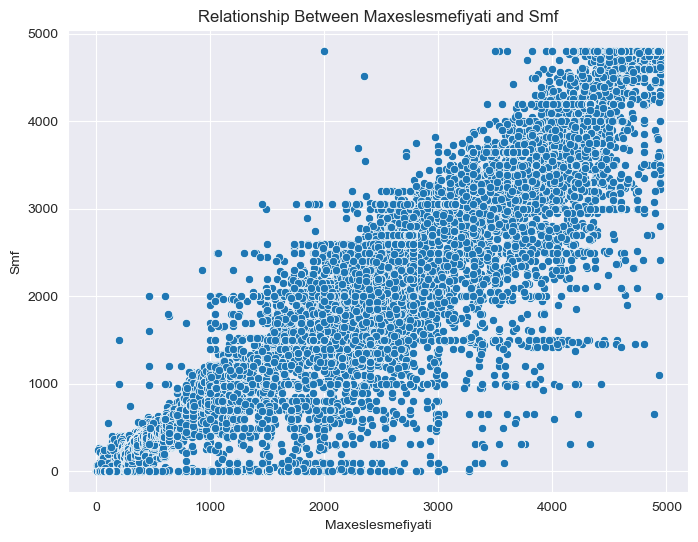

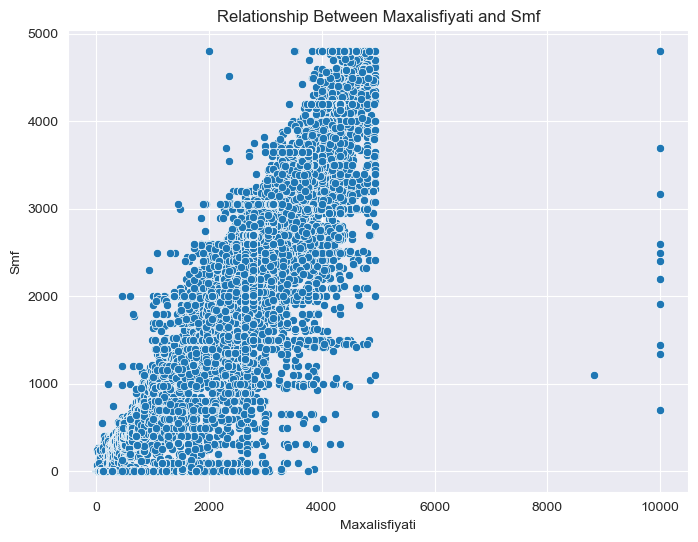

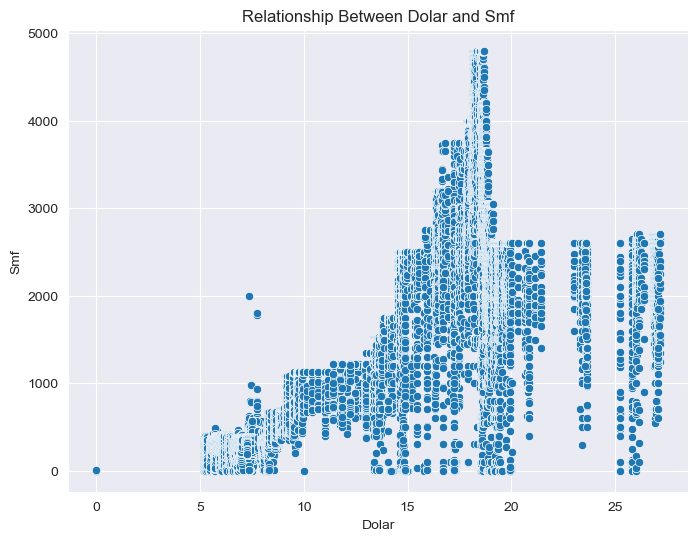

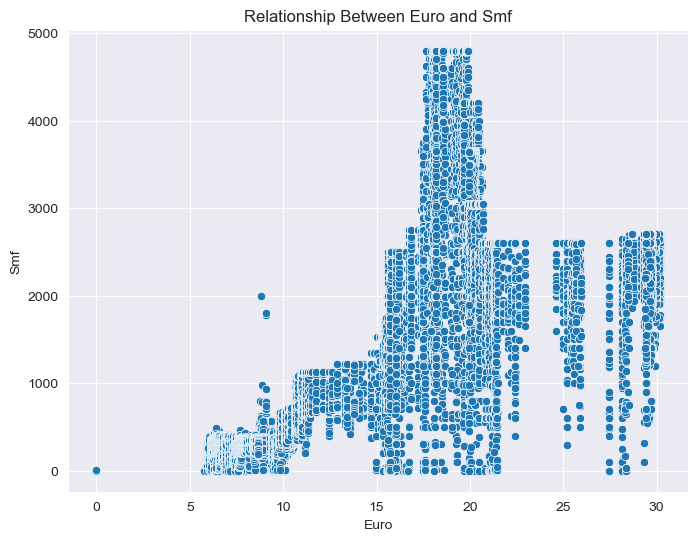

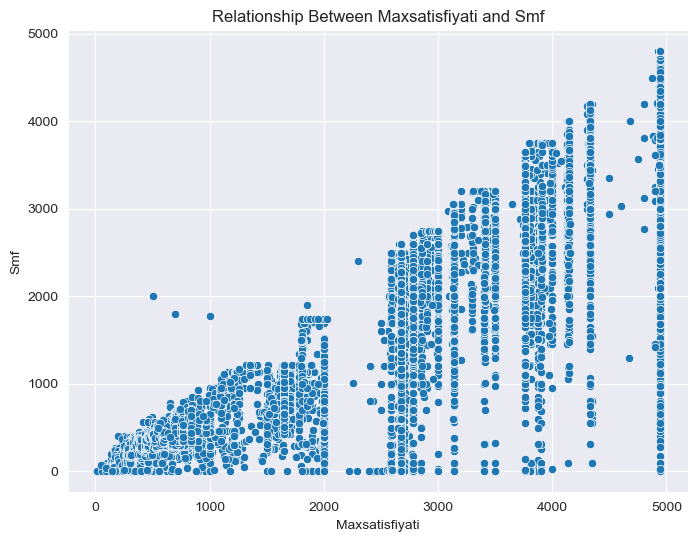

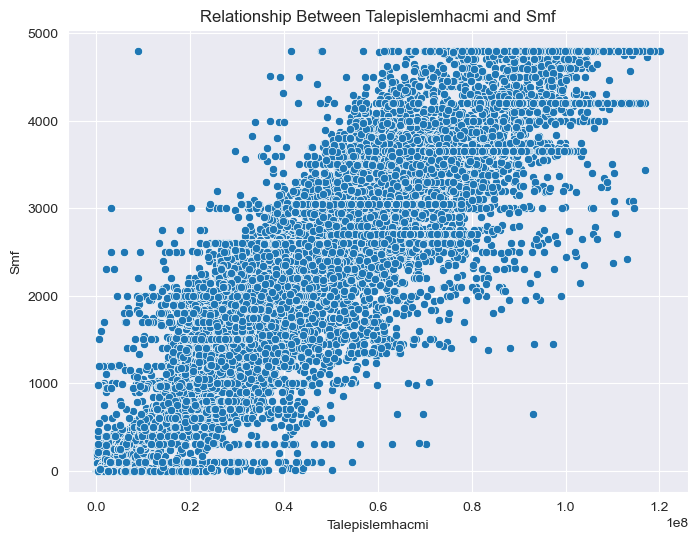

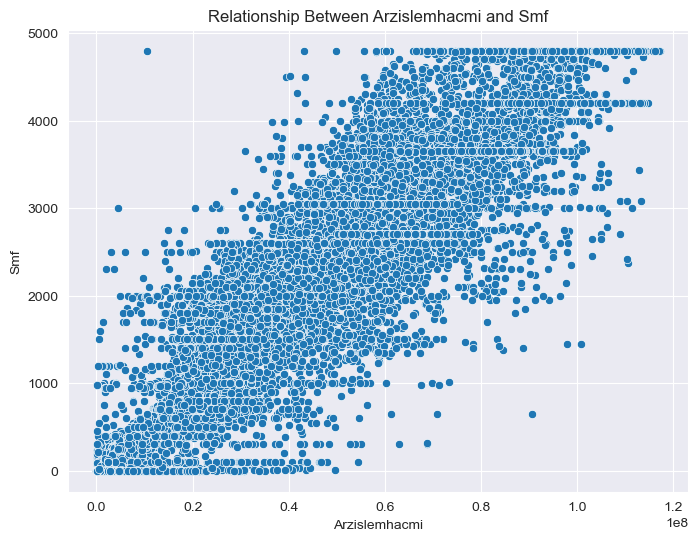

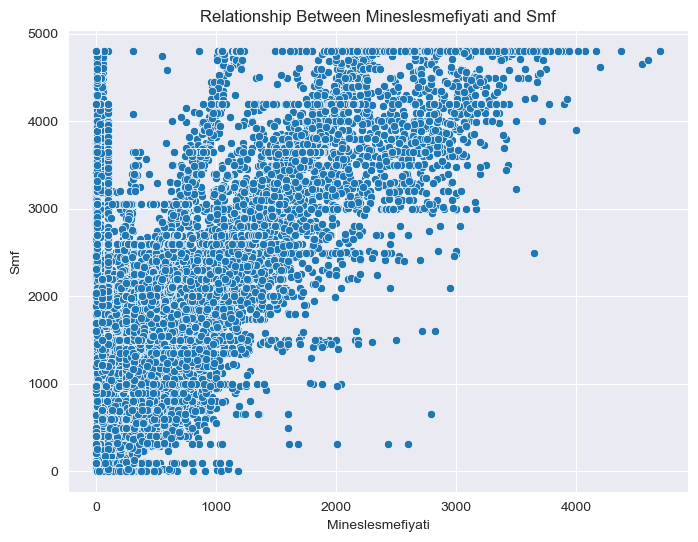

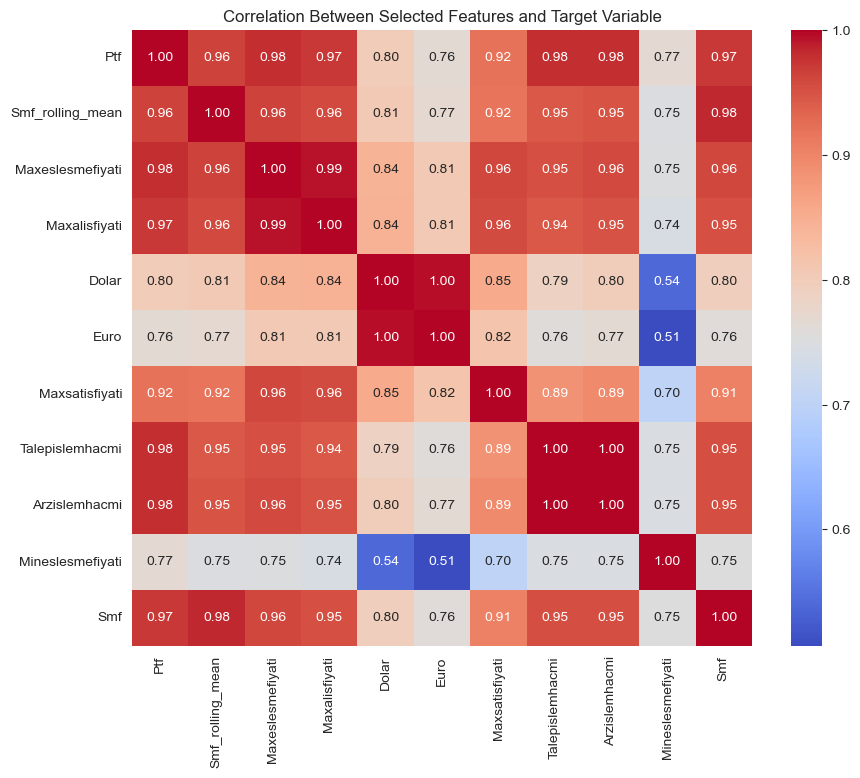

Analiz tamamlandı. Görseller 'C:\Users\PC\Documents\GitHub\LFD_24-25\results\feature_analysis' konumuna kaydedildi.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_selected_features(data_path, output_path):
    """
    Seçilen özelliklerin analizini gerçekleştirir ve hedef değişkenle olan ilişkilerini inceler.

    Args:
        data_path (str): Veri setinin yolu.
        output_path (str): Görsellerin kaydedileceği dizin.
    """
    # Veri setini yükle
    data = pd.read_csv(data_path)

    # Hedef değişken
    target_variable = 'Smf'

    # Seçilen özelliklerin listesi
    selected_features = [
        'Ptf', 'Smf_rolling_mean', 'Maxeslesmefiyati', 'Maxalisfiyati',
        'Dolar', 'Euro', 'Maxsatisfiyati', 'Talepislemhacmi',
        'Arzislemhacmi', 'Mineslesmefiyati'
    ]

    # 1. Seçilen özelliklerin dağılımlarını görselleştir
    for feature in selected_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[feature], kde=True, bins=20)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.savefig(f"{output_path}/{feature}_distribution.png")
        plt.show()
        plt.close()

    # 2. Seçilen özelliklerle hedef değişkenin ilişkisini görselleştir
    for feature in selected_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[feature], y=data[target_variable])
        plt.title(f"Relationship Between {feature} and {target_variable}")
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.savefig(f"{output_path}/{feature}_relationship.png")
        plt.show()
        plt.close()

    # 3. Seçilen özelliklerin hedef değişkenle korelasyonunu incele
    correlation_matrix = data[selected_features + [target_variable]].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Selected Features and Target Variable")
    plt.savefig(f"{output_path}/correlation_matrix.png")
    plt.show()
    plt.close()

    print(f"Analiz tamamlandı. Görseller '{output_path}' konumuna kaydedildi.")

# Örnek Kullanım
if __name__ == "__main__":
    data_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\final_feature_selection.csv"
    output_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\results\feature_analysis"

    analyze_selected_features(data_path, output_path)
